# Exercise 06 Classification III

### Import libraries

In [48]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report

## Part 3. Hands-on exercise

In this exercise, we will build a multi-class classifier with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

The goal of the classifier is to perform a multi-class classification taks:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Build the classifier using decision tree.
- Perform hyper-parameter tuning through cross-validation to improve model's performance.
    - Use grid search strategy `sklearn.model_selection.GridSearchCV`
    - Use random search strategy `sklearn.model_selection.RandomizedSearchCV`

### Task 1. Load, pre-process, and split the dataset

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Load the dataset
- Construct the new multi-class target variable use `MedHouseVal` as reference
- Split the dataset into training and testing sets

In [24]:
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing 
# Fetch the California housing dataset
data_California = fetch_california_housing(as_frame=True)

# load datasets
target_df = data_California.target

In [25]:
# Create a multi-class target variable based on the value of MedHouseVal
new_target = pd.Series(index=target_df.index) # Initialize with the same index
new_target[target_df < 1] = 0
new_target[(target_df >= 1) & (target_df <= 2.5)] = 1
new_target[target_df > 2.5] = 2


# Create the multi-class target variable based on the value of MedHouseVal
target_df = pd.cut(target_df, bins=[-float("inf"), 1, 2.5, float("inf")], labels=[0, 1, 2])


# Ensure the data type is integer for the new target
new_target = new_target.astype(int)
# count the number of values in a Pandas Series
new_target_count = new_target.count()
print("Total target values labeled",new_target_count)

# Check the balance of the newly created classes
print("Number of 'Low Price' class (0):", sum(new_target == 0))
print("Number of 'Normal Price' class (1):", sum(new_target == 1))
print("Number of 'Expensive Price' class (2):", sum(new_target == 2))

Total target values labeled 20640
Number of 'Low Price' class (0): 3596
Number of 'Normal Price' class (1): 11262
Number of 'Expensive Price' class (2): 5782


C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_4264\836359747.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_target = pd.Series(index=target_df.index) # Initialize with the same index


In [26]:
# [TBC] complete your code here with proper co
feature_df, target_df = data_California.data, data_California.target
target_df = new_target

# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[-10:]]
feature_df.info()

feature_df.info()
# print the target class
target_df.info()
# create a pandas series with MedHouseVal as the reference
# target_df = pd.Series(data=feature_df['MedHouseVal'], name='target')

# print the target class
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   L

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)
#binary_target_df.values,
#target_df.values,

print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))


Size of training dataset: 14447
Size of testing dataset: 6193


### Task 2. Hyper-parameter tuning using grid search strategy

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Define the hyper-parameters to search
    - `criterion`
    - `max_depth`
    - `min_samples_split`
    - `min_samples_leaf`
    - `max_features`
    - `min_impurity_decrease`
- Perform grid search with cross-validation
    - Check the best estimator and the best score
    - If needed, refine the hyper-parameters to search, redo the grid search
    - If good enough, continue with the best hyper-parameters found by the grid search
- Train the model with the best hyper-parameters
- Evaluate the performance with the testing dataset

In [34]:
# train a classifier using decision tree
# Define the hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Initialize the classifier
clf = DecisionTreeClassifier()

In [35]:
# [TBC] complete your code here with proper comments
# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [36]:
# Check the best estimator and the best score
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)
print("Best Score:", grid_search.best_score_)

# Train the model with the best hyper-parameters
best_estimator.fit(X_train, y_train)

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)
Best Score: 0.7773937653981633


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

In [37]:
# Evaluate the performance with the testing dataset
test_score = best_estimator.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.7841110931697077


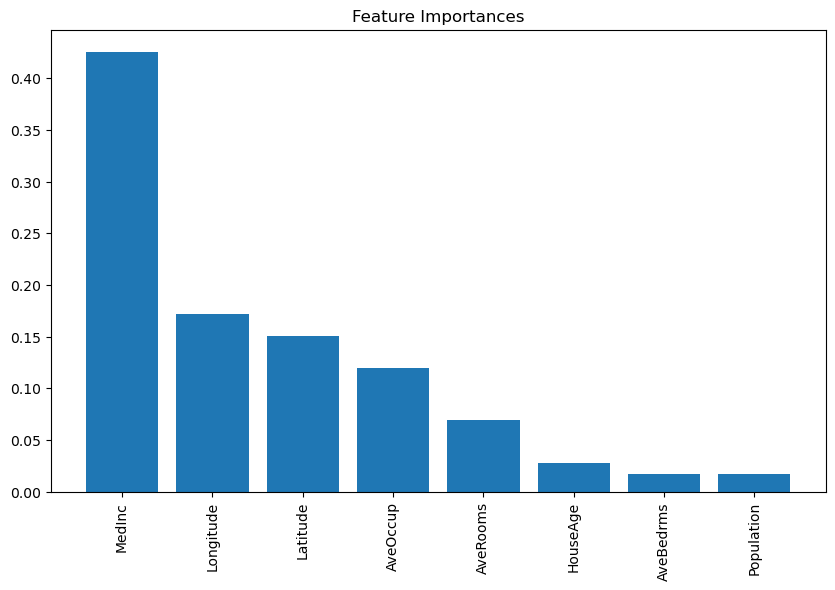

In [40]:
# Plot feature importances
feature_importances = best_estimator.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_df.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

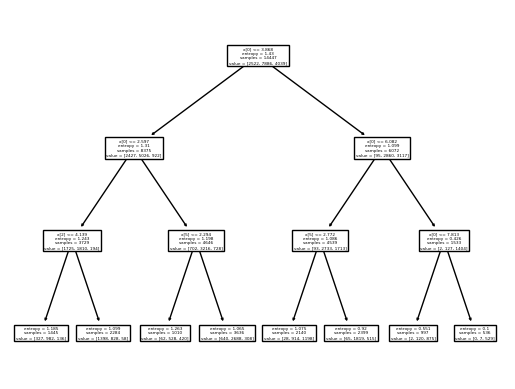

In [43]:
# pre-pruning by limiting the max depth of the tree
clf = DecisionTreeClassifier(
    criterion = 'entropy', # use information gain as the criterion
    max_depth = 3
)
clf.fit(X_train, y_train)
# plot the tree structure
plot_tree(clf)
plt.show()

In [45]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 prediction
y_pred[:5]
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1074
           1       0.71      0.77      0.74      3376
           2       0.73      0.63      0.68      1743

    accuracy                           0.69      6193
   macro avg       0.67      0.65      0.66      6193
weighted avg       0.69      0.69      0.69      6193



### Task 3. Hyper-parameter tuning using random search strategy

Instead of perform an exhausive grid search, using random search strategy instead.

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Define the hyper-parameters to search
- Perform random search with cross-validation
- Train the model with the best hyper-parameters
- Evaluate the performance with the testing dataset

In [46]:
# [TBC] complete your code here with proper comments

# Define the hyperparameters grid
param_dist = {
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20)
}

# Decision Tree Classifier
dt = DecisionTreeClassifier()

In [49]:
# Random search with cross-validation
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=0)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19],
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 20)},
                   random_state=0, verbose=1)

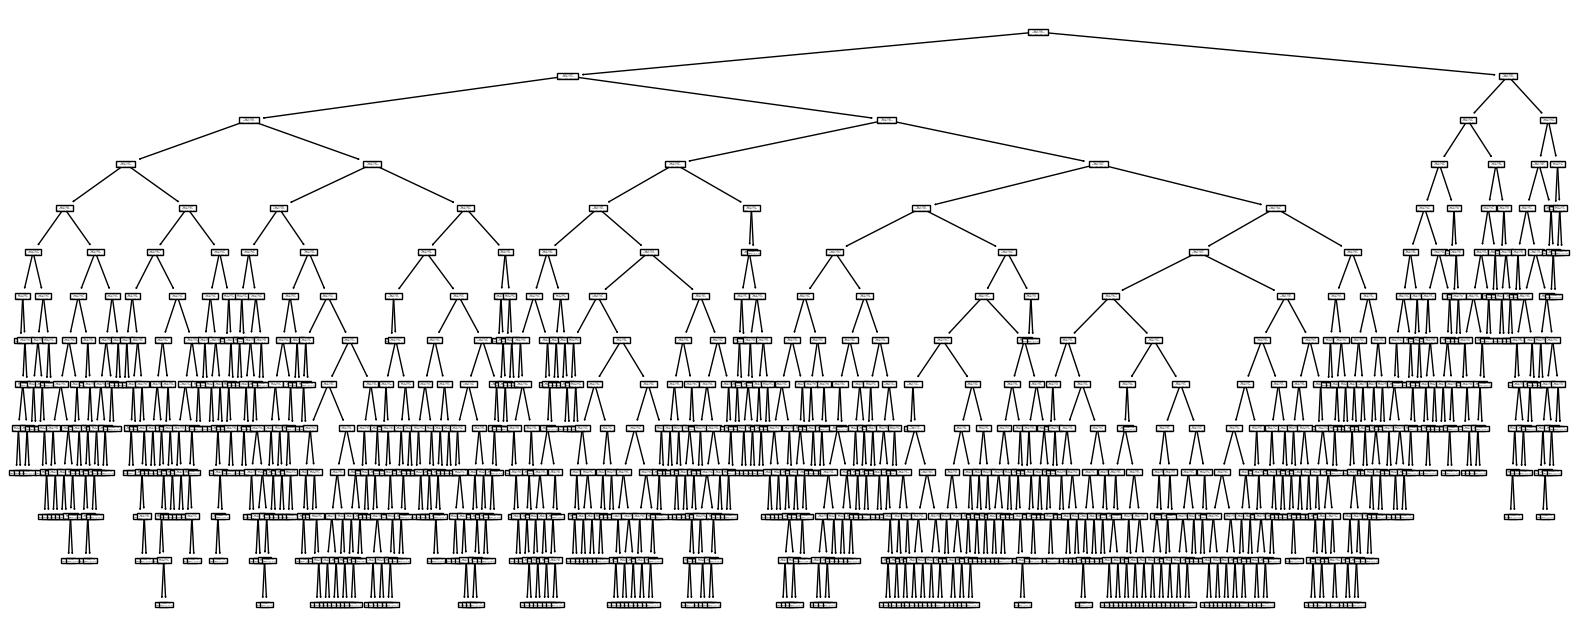

In [55]:
# obtain the best estimator
plt.figure(figsize = [20, 8])
plot_tree(random_search.best_estimator_)
plt.show()

In [51]:
# Train the model with the best hyperparameters
best_dt = random_search.best_estimator_
# Evaluate the performance on the test set
predictions = best_dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1074
           1       0.80      0.84      0.82      3376
           2       0.81      0.76      0.78      1743

    accuracy                           0.80      6193
   macro avg       0.79      0.77      0.78      6193
weighted avg       0.80      0.80      0.79      6193

